In [ ]:
#!pip install matplotlib seaborn

     ---------------------------------------- 0.0/52.8 kB ? eta -:--:--
     ------- -------------------------------- 10.2/52.8 kB ? eta -:--:--
     ---------------------- --------------- 30.7/52.8 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 52.8/52.8 kB 458.0 kB/s eta 0:00:00
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
     ---------------------------------------- 0.0/116.4 kB ? eta -:--:--
     -------------------- ------------------ 61.4/116.4 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 116.4/116.4 kB 2.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
    --------------------------------------- 0.1/8.1 MB 2.8 MB/s eta 0:00:03
   - -------------------------------------- 0.3/8.1 MB 3.5 MB/s eta 0:00:03
   -- ------------------------------------- 0.5/8.1 MB 3.9 MB/s eta 0:00:02
   -- ------------------------------------- 0.5/8.1 MB 3.4 MB/s eta 0:00:03
   --- -----------------


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

--- Jumlah Data Per Emosi ---
emotion_label
Sad         50302
Love        47852
Surprise    30902
Joy         29859
Name: count, dtype: int64

--- Persentase Data ---
emotion_label
Sad         31.65%
Love        30.11%
Surprise    19.45%
Joy         18.79%
Name: proportion, dtype: object


C:\Users\Jeremy Wijaya\AppData\Local\Temp\ipykernel_12368\3347311062.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=distribusi_emosi.index, y=distribusi_emosi.values, palette="viridis")


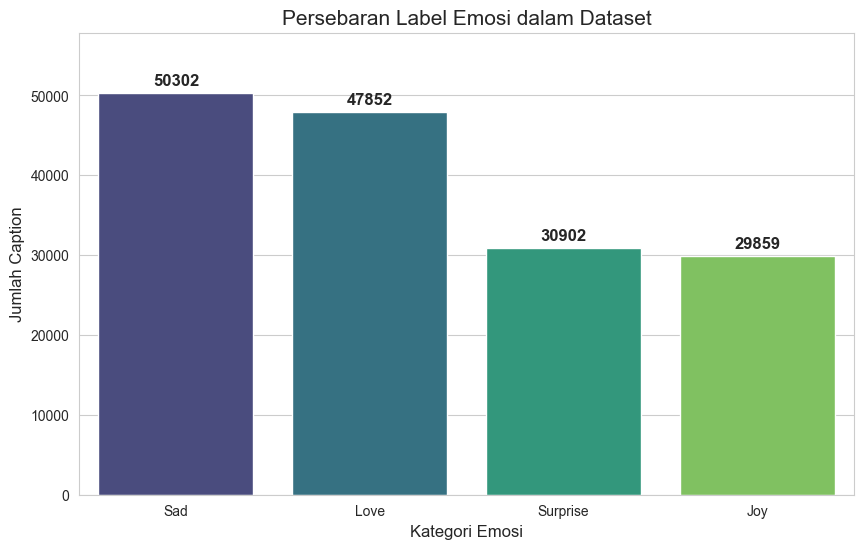

In [4]:
# 1. Load dataset yang sudah terlabeli
current_dir = Path().absolute()
file_path = current_dir.parent / 'data' / 'raw' / 'dataset_with_mood.csv'

if file_path.exists():
    df = pd.read_csv(file_path)
    
    # 2. Menghitung jumlah masing-masing emosi
    distribusi_emosi = df['emotion_label'].value_counts()
    persentase_emosi = df['emotion_label'].value_counts(normalize=True) * 100

    print("--- Jumlah Data Per Emosi ---")
    print(distribusi_emosi)
    print("\n--- Persentase Data ---")
    print(persentase_emosi.round(2).astype(str) + '%')

    # 3. Visualisasi dengan Bar Chart
    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")
    
    # Membuat Bar Plot
    ax = sns.barplot(x=distribusi_emosi.index, y=distribusi_emosi.values, palette="viridis")
    
    # Menambahkan angka di atas bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points',
                    fontsize=12, fontweight='bold')

    plt.title('Persebaran Label Emosi dalam Dataset', fontsize=15)
    plt.xlabel('Kategori Emosi', fontsize=12)
    plt.ylabel('Jumlah Caption', fontsize=12)
    plt.ylim(0, distribusi_emosi.max() + (distribusi_emosi.max()*0.15)) # Memberi ruang untuk teks angka
    
    # Simpan grafik untuk lampiran skripsi
    plt.savefig('visualisasi_distribusi_emosi.png', dpi=300)
    plt.show()

else:
    print(f"File tidak ditemukan di: {file_path}")

In [7]:
# Menampilkan 10 contoh acak untuk evaluasi silang (cross-check) dengan file gambar
for emotion in df['emotion_label'].unique():
    print(f"\n" + "="*80)
    print(f" EVALUASI EMOSI: {emotion.upper()} ")
    print("="*80)
    
    # Mengambil sampel acak termasuk kolom image_filename
    samples = df[df['emotion_label'] == emotion][['image_filename', 'caption_desc']].sample(
        n=min(10, len(df[df['emotion_label'] == emotion]))
    )
    
    # Menampilkan Nama File dan Caption untuk mempermudah buka folder gambar
    for i, (idx, row) in enumerate(samples.iterrows(), 1):
        print(f"{i}. [FILE: {row['image_filename']}]")
        print(f"   Caption: {row['caption_desc']}")
        print("-" * 30)


 EVALUASI EMOSI: SAD 
1. [FILE: 363056425.jpg]
   Caption: people at an outdoor farmer 's market .
------------------------------
2. [FILE: 2705298070.jpg]
   Caption: two man practicing kung fu fighting while their trainer watches .
------------------------------
3. [FILE: 2808285842.jpg]
   Caption: a bride in a white dress and a groom in a black suit are kneeling before an alter in a crowded church .
------------------------------
4. [FILE: 3544793763.jpg]
   Caption: two boxers fight in a well-lit ring surrounded by poorly-lit seating .
------------------------------
5. [FILE: 4329180126.jpg]
   Caption: four young asian people stand in a line looking at a paper .
------------------------------
6. [FILE: 5123250615.jpg]
   Caption: firemen clean up the scene of a major motor vehicle accident , in which a sedan and a truck collided and are both smashed .
------------------------------
7. [FILE: 29339871.jpg]
   Caption: two young men , one in blue and one in red , stand balanced on